In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sub=pd.read_pickle('D:/NYU/Market Analytics/final/Digital Marketing Analytics final case project data/subscribers')
df_eng=pd.read_pickle('D:/NYU/Market Analytics/final/Digital Marketing Analytics final case project data/engagement')
df_rep=pd.read_pickle('D:/NYU/Market Analytics/final/Digital Marketing Analytics final case project data/customer_service_reps')

In [3]:
df_sub.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [4]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [5]:
df_eng.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [6]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [7]:
df_rep.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [8]:
df_rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    object        
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 206.4+ MB


In [9]:
df_sub['plan_type'].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
high_jpy_14_day_trial                     1
low_sar_no_trial                          1
Name: plan_type, dtype: int64

In [10]:
df_sub['package_type'].value_counts()

base        111464
enhanced     63241
economy      17349
Name: package_type, dtype: int64

In [11]:
df_sub['revenue_net'].value_counts()

 0.0000     142622
 4.5875      18802
 9.2117       4187
 9.1750       2074
 4.8811       1719
             ...  
-4.9912          1
 10.7164         1
 12.7716         1
-3.8535          1
 10.6797         1
Name: revenue_net, Length: 383, dtype: int64

In [12]:
df_sub['discount_price'].value_counts()

4.5141    227096
5.0279       325
1.0276       167
4.2205        18
4.0737        12
4.3673         4
4.4407         2
3.7801         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [13]:
df_sub['join_fee'].value_counts()

 0.0367    109482
 0.0000     33482
 0.3303     25314
 0.6606     12282
 0.1101     10648
 0.3670      1333
 0.1835       146
-0.0367         9
 0.6973         8
 0.6239         6
-0.6606         2
 0.0734         2
 0.2936         2
 0.1468         2
 0.2569         1
 0.5872         1
 0.4037         1
 0.7340         1
-0.3303         1
-0.1101         1
Name: join_fee, dtype: int64

In [14]:
df_sub[~df_sub['revenue_net'].isna()]['plan_type'].value_counts()

base_uae_14_day_trial                192192
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
high_jpy_14_day_trial                     1
low_sar_no_trial                          1
Name: plan_type, dtype: int64

In [15]:
df_sub[~df_sub['revenue_net'].isna()].groupby(by='plan_type').mean()['revenue_net']

plan_type
base_eur_14_day_trial                2.948233
base_uae_14_day_trial                1.556599
base_uae_no_trial_7_day_guarantee    4.587500
high_aud_14_day_trial                5.798600
high_jpy_14_day_trial                0.036700
high_sar_14_day_trial                0.975608
high_uae_14_day_trial                2.054974
low_eur_no_trial                     0.000000
low_gbp_14_day_trial                 1.064300
low_sar_no_trial                     0.770700
low_uae_no_trial                     1.314827
Name: revenue_net, dtype: float64

In [16]:
df_rep.groupby(['num_trial_days','current_sub_TF'])['current_sub_TF'].count()

num_trial_days  current_sub_TF
0               False               49926
                True                30032
7               False              122759
                True                37837
14              False             1217670
                True               750419
Name: current_sub_TF, dtype: int64

In [17]:
df_rep.groupby(['num_trial_days','trial_completed_TF'])['trial_completed_TF'].count()

num_trial_days  trial_completed_TF
0               False                    1442
                True                    78516
7               True                   160596
14              False                  659497
                True                  1308592
Name: trial_completed_TF, dtype: int64

In [18]:
len(df_rep['subid'].unique())

1369360

In [19]:
df_rep.groupby(['num_trial_days'])['revenue_net_1month'].mean()

num_trial_days
0     0.937749
7     0.971299
14    2.405422
Name: revenue_net_1month, dtype: float64

In [20]:
df_rep[df_rep['num_trial_days']==14]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
9,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,1,2020-04-02 01:20:25,NaT,NaN
60,33513851,28948735,False,2020-04-06 19:21:05,2020-03-27 23:59:39,14,False,OTT,0.0000,0,2020-03-27 23:59:39,NaT,False
61,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
62,31856201,27800927,True,NaT,2020-03-27 23:59:04,14,True,OTT,4.5875,0,2020-03-28 00:05:20,2020-04-11 11:05:24,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248401,33218156,21781165,True,NaT,2019-06-30 00:00:06,14,True,OTT,3.8902,1,2019-07-14 11:05:50,NaT,NaN
2248402,34478389,27625059,False,2019-07-01 10:27:01,2019-06-30 00:00:06,14,False,OTT,0.0000,0,2019-06-30 00:00:06,NaT,NaN
2248403,38647874,27845350,False,NaT,2019-06-30 00:00:04,14,True,OTT,3.5232,0,2019-06-30 00:00:04,2019-07-14 11:07:06,NaN
2248404,38647874,27845350,False,NaT,2019-06-30 00:00:04,14,True,OTT,3.5232,1,2019-07-14 11:07:06,2019-09-11 11:07:12,NaN


## A/B testing

In [76]:
## Assume that num_trial_days would have impact on the revenue and subscription
## Assume those who completed the trial are our considered target customer
## With exploratory anlysis we found that customers are more likely to choose trial options, which is reasonable
AB_filter=(df_rep['payment_period']==0) #& (df_rep['num_trial_days']!=0) & (df_rep['trial_completed_TF']==True)## period==0 because we only consider those who are willing to be our client after trial
df_rep_T=df_rep[AB_filter]
df_rep_T

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
10,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,NaN
12,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,NaN
14,38637729,24230000,True,NaT,2020-03-27 22:59:09,0,True,google,1.1377,0,2020-03-27 22:59:09,2020-03-28 04:59:17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248399,31803812,21965147,False,2019-07-04 15:37:24,2019-06-30 00:00:13,14,False,OTT,0.0000,0,2019-06-30 00:00:13,NaT,NaN
2248400,33218156,21781165,True,NaT,2019-06-30 00:00:06,14,True,OTT,3.8902,0,2019-06-30 00:00:06,2019-07-14 11:05:50,NaN
2248402,34478389,27625059,False,2019-07-01 10:27:01,2019-06-30 00:00:06,14,False,OTT,0.0000,0,2019-06-30 00:00:06,NaT,NaN
2248403,38647874,27845350,False,NaT,2019-06-30 00:00:04,14,True,OTT,3.5232,0,2019-06-30 00:00:04,2019-07-14 11:07:06,NaN


In [77]:
pd.crosstab(df_rep_T['current_sub_TF'], df_rep_T['num_trial_days'])

num_trial_days,0,7,14
current_sub_TF,,,
False,17704,58553,963792
True,6486,5490,317335


In [78]:
pd.crosstab(df_rep['current_sub_TF'], df_rep['num_trial_days'])

num_trial_days,0,7,14
current_sub_TF,,,
False,49926,122759,1217670
True,30032,37837,750419


In [85]:
## Try with period = 0
T_A=df_rep_T[df_rep_T['num_trial_days']== 0]
T_B=df_rep_T[df_rep_T['num_trial_days']== 14]
T_C=df_rep_T[df_rep_T['num_trial_days']== 7]
T_mean_a = sum(T_A['current_sub_TF'])/len(T_A['current_sub_TF'])
T_mean_b = sum(T_B['current_sub_TF'])/len(T_B['current_sub_TF'])
T_mean_c = sum(T_C['current_sub_TF'])/len(T_C['current_sub_TF'])
print(T_mean_a)
print(T_mean_b)
print(T_mean_c)

0.26812732534105
0.24769987674914354
0.08572365441968677


In [80]:
## the total conversion rate is also not very good for 7 trial days
#T_A=df_rep[df_rep['num_trial_days']== 0]
#T_B=df_rep[df_rep['num_trial_days']== 14]
#T_C=df_rep[df_rep['num_trial_days']== 7]
#T_mean_a = sum(T_A['current_sub_TF'])/len(T_A['current_sub_TF'])
#T_mean_b = sum(T_B['current_sub_TF'])/len(T_B['current_sub_TF'])
#T_mean_c = sum(T_C['current_sub_TF'])/len(T_C['current_sub_TF'])
print(T_mean_a)
print(T_mean_b)
print(T_mean_c)

0.3755971885239751
0.3812932240361081
0.23560362649131983


In [86]:
T_z_score = (T_mean_a - T_mean_b)/pow((T_mean_b*(1-T_mean_b))/len(T_A),0.5) #one-sample z test
print(f'z score: {T_z_score:.2f}')
if T_z_score >= 1.64:
    print('Reject null hypothesis.')
else:
    print('Fail to Reject null hypothesis.')

z score: 7.36
Reject null hypothesis.


In [87]:
# using a significance level of 0.05, and setting power to 0.80, we have tα/2 = 1.96 and tβ = 0.84 from standard normal tables.
import math
import statistics
tα_2 = 1.96
tβ = 0.84
pool_variance = T_mean_a*(1-T_mean_a)+T_mean_b*(1-T_mean_b)
n_1 = math.ceil((pool_variance/(T_mean_a-T_mean_b)**2)*((tβ+tα_2)**2))
n_1

7189

In [88]:
for i in range(10,20):
    sample_A = T_A.sample(n=n_1)
    conversion_A = sum(sample_A['current_sub_TF'])/len(sample_A['current_sub_TF'])
    z_score = (conversion_A - T_mean_b)/pow((T_mean_b*(1-T_mean_b))/len(sample_A),0.5)
    if z_score >= 1.64:
        print(f'z_score: {z_score:.2f}','Reject null hypothesis.')
    else:
        print(f'z_score: {z_score:.2f}','Fail to Reject null hypothesis.')

z_score: 4.16 Reject null hypothesis.
z_score: 3.81 Reject null hypothesis.
z_score: 3.56 Reject null hypothesis.
z_score: 2.79 Reject null hypothesis.
z_score: 5.20 Reject null hypothesis.
z_score: 4.84 Reject null hypothesis.
z_score: 3.81 Reject null hypothesis.
z_score: 4.35 Reject null hypothesis.
z_score: 3.56 Reject null hypothesis.
z_score: 4.32 Reject null hypothesis.


In [29]:
## So that seems customer who select no trial days would more likely to be a formal client
## but there is also some bugs, like , for those with no trials, they probably need the product most

In [30]:
## So let's take a look on another side --- revenue
df_rep.groupby(['num_trial_days'])['revenue_net_1month'].mean()

num_trial_days
0     0.937749
7     0.971299
14    2.405422
Name: revenue_net_1month, dtype: float64

In [31]:
## To find if 7 trial days makes more revenue than none trial days 
R_A=df_rep[df_rep['num_trial_days']==7]
R_B=df_rep[df_rep['num_trial_days']==0]
R_mean_a = R_A['revenue_net_1month'].mean()
R_mean_b = R_B['revenue_net_1month'].mean()
print(R_mean_a,R_mean_b)
R_z_score = (R_mean_a - R_mean_b)/pow((R_mean_b*(1-R_mean_b))/len(R_A),0.5) #one-sample z test
print(f'z score: {R_z_score:.2f}')
if R_z_score >= 1.64:
    print('Reject null hypothesis.')
else:
    print('Fail to Reject null hypothesis.')

0.9712992895223638 0.9377493046353309
z score: 55.65
Reject null hypothesis.


In [32]:
tα_2 = 1.96
tβ = 0.84
pool_variance = 2*(np.var(df_rep[df_rep['num_trial_days']!=14]['revenue_net_1month']))
n_1 = math.ceil((pool_variance/(R_mean_a-R_mean_b)**2)*((tβ+tα_2)**2))
n_1

3073

In [33]:
np.var(df_rep[df_rep['num_trial_days']!=14]['revenue_net_1month'])

0.22053938966540004

In [34]:
for i in range(10,20):
    sample_A = R_A.sample(n=n_1)
    conversion_A = sum(sample_A['revenue_net_1month'])/len(sample_A['revenue_net_1month'])
    #print(conversion_A)
    z_score = (conversion_A - R_mean_b)/pow((R_mean_b*(1-R_mean_b))/len(sample_A),0.5)
    if z_score >= 1.64:
        print(f'z_score: {z_score:.2f}','Reject null hypothesis.')
    else:
        print(f'z_score: {z_score:.2f}','Fail to Reject null hypothesis.')

z_score: 8.34 Reject null hypothesis.
z_score: 9.14 Reject null hypothesis.
z_score: 6.15 Reject null hypothesis.
z_score: 11.92 Reject null hypothesis.
z_score: 6.72 Reject null hypothesis.
z_score: 6.57 Reject null hypothesis.
z_score: 5.27 Reject null hypothesis.
z_score: 8.56 Reject null hypothesis.
z_score: 10.12 Reject null hypothesis.
z_score: 9.80 Reject null hypothesis.


In [35]:
AB_filter_2=(df_rep['payment_period']==0)  & (df_rep['trial_completed_TF']==False)

In [36]:
df_rep_T_2=df_rep[AB_filter_2]
df_rep_T_2[df_rep_T_2['current_sub_TF']==True]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew


## Customer Segmentation

In [393]:
df_eng_rep = df_rep.merge(df_eng,'inner',on='subid')

In [394]:
df_eng_rep.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period_x,...,next_payment,renew,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y
0,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0,0,...,NaT,False,2020-03-27,3.0,0.0,3.0,14.0,0.0,0.0,0.0
1,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0,0,...,NaT,False,2020-03-28,1.0,3.0,0.0,6.0,0.0,0.0,0.0
2,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0,0,...,NaT,False,2020-03-30,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0,0,...,NaT,False,2020-04-07,1.0,1.0,0.0,5.0,0.0,0.0,0.0
4,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0,0,...,NaT,False,2020-04-08,1.0,1.0,0.0,4.0,0.0,0.0,0.0


In [395]:
df_eng_rep.shape[0]

5676474

In [396]:
['months_per_bill_period',]

['months_per_bill_period']

In [397]:
df_sub['join_fee'].value_counts()

 0.0367    109482
 0.0000     33482
 0.3303     25314
 0.6606     12282
 0.1101     10648
 0.3670      1333
 0.1835       146
-0.0367         9
 0.6973         8
 0.6239         6
-0.6606         2
 0.0734         2
 0.2936         2
 0.1468         2
 0.2569         1
 0.5872         1
 0.4037         1
 0.7340         1
-0.3303         1
-0.1101         1
Name: join_fee, dtype: int64

In [398]:
df_sub['monthly_price'].value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

In [399]:
df_sub['discount_price'].value_counts()

4.5141    227096
5.0279       325
1.0276       167
4.2205        18
4.0737        12
4.3673         4
4.4407         2
3.7801         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [400]:
df_sub['paid_TF'].value_counts()

False    135578
True      92050
Name: paid_TF, dtype: int64

In [401]:
## We drop some outliers first
df_sub_A=df_sub[~df_sub['age'].isna()]
df_sub_id=df_sub_A['subid']
df_sub_A=df_sub_A[~df_sub_A['package_type'].isna()]
df_sub_A=df_sub_A[~df_sub_A['male_TF'].isna()]
df_sub_A=df_sub_A[~df_sub_A['attribution_survey'].isna()]
df_sub_A=df_sub_A[~df_sub_A['intended_use'].isna()]
df_sub_A=df_sub_A[~df_sub_A['creation_until_cancel_days'].isna()]
df_sub_A=df_sub_A[~df_sub_A['preferred_genre'].isna()]
df_sub_A=df_sub_A.drop(['payment_type','subid','months_per_bill_period','revenue_net','discount_price','account_creation_date','trial_end_date','op_sys','language','creation_until_cancel_days','country'],axis=1)
df_sub_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122715 entries, 380374 to 598241
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  122715 non-null  object 
 1   num_weekly_services_utilized  67305 non-null   float64
 2   preferred_genre               122715 non-null  object 
 3   intended_use                  122715 non-null  object 
 4   weekly_consumption_hour       121978 non-null  float64
 5   num_ideal_streaming_services  67058 non-null   float64
 6   retarget_TF                   122715 non-null  bool   
 7   age                           122715 non-null  float64
 8   male_TF                       122715 non-null  object 
 9   attribution_technical         122715 non-null  object 
 10  attribution_survey            122715 non-null  object 
 11  plan_type                     122715 non-null  object 
 12  monthly_price                 122715 no

In [402]:
df_sub_A[df_sub_A['monthly_price']==4.7343]['plan_type'].value_counts()

base_uae_14_day_trial    122466
low_gbp_14_day_trial          3
Name: plan_type, dtype: int64

In [403]:
df_sub_A['cancel_before_trial_end'].value_counts()

False    104064
True      18651
Name: cancel_before_trial_end, dtype: int64

In [404]:
df_sub_A['weekly_consumption_hour'].value_counts()

 25.851492    16881
 28.751405    14962
 27.301448    14583
 24.401536    13313
 30.201361    11967
              ...  
 73.700050        1
-29.246847        1
-11.847372        1
 4.102148         1
 27.362089        1
Name: weekly_consumption_hour, Length: 61, dtype: int64

In [405]:
df_sub_F=df_sub_A
df_sub_F['num_weekly_services_utilized'].fillna(df_sub_F['num_weekly_services_utilized'].mean(),inplace=True)
df_sub_F['num_ideal_streaming_services'].fillna(df_sub_F['num_ideal_streaming_services'].mean(),inplace=True)
df_sub_F['weekly_consumption_hour'].fillna(df_sub_F['weekly_consumption_hour'].mean(),inplace=True)
df_sub_F['weekly_consumption_hour'] = pd.to_numeric(df_sub_F['weekly_consumption_hour'],errors='coerce')


In [406]:
outlier_filter = (df_sub_F['age']>18) & (df_sub_F['age']<80 )& (df_sub_F['weekly_consumption_hour']>0)
df_sub_F=df_sub_F[outlier_filter]

In [407]:
df_sub_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120879 entries, 380374 to 598241
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  120879 non-null  object 
 1   num_weekly_services_utilized  120879 non-null  float64
 2   preferred_genre               120879 non-null  object 
 3   intended_use                  120879 non-null  object 
 4   weekly_consumption_hour       120879 non-null  float64
 5   num_ideal_streaming_services  120879 non-null  float64
 6   retarget_TF                   120879 non-null  bool   
 7   age                           120879 non-null  float64
 8   male_TF                       120879 non-null  object 
 9   attribution_technical         120879 non-null  object 
 10  attribution_survey            120879 non-null  object 
 11  plan_type                     120879 non-null  object 
 12  monthly_price                 120879 no

In [408]:
df_sub_F.head()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,attribution_technical,attribution_survey,plan_type,monthly_price,cancel_before_trial_end,initial_credit_card_declined,join_fee,paid_TF,refund_after_trial_TF
380374,base,2.979588,comedy,access to exclusive content,22.951579,1.997700,False,70.0,False,facebook,facebook,base_uae_14_day_trial,4.7343,False,False,0.3303,False,False
496617,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,organic,facebook,base_uae_14_day_trial,4.7343,False,False,0.1101,False,False
356799,base,2.979588,drama,replace OTT,20.051667,1.997700,False,30.0,False,search,tv,base_uae_14_day_trial,4.7343,False,False,0.0367,False,False
681701,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,discovery,youtube,base_uae_14_day_trial,4.7343,False,False,0.0367,False,False
284782,base,2.979588,comedy,access to exclusive content,20.051667,1.997700,False,70.0,False,bing,tv,base_uae_14_day_trial,4.7343,True,False,0.3303,True,True


In [410]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [411]:
df_sub_K=pd.get_dummies(df_sub_F,prefix='attribution_technical',prefix_sep='_',columns=['attribution_technical'])

In [412]:
df_sub_K=pd.get_dummies(df_sub_K,prefix='attribution_survey',prefix_sep='_',columns=['attribution_survey'])

In [413]:
df_sub_K=pd.get_dummies(df_sub_K,prefix='plan_type',prefix_sep='_',columns=['plan_type'])

In [414]:
#df_sub_K=pd.get_dummies(df_sub_K,prefix='country',prefix_sep='_',columns=['country'])

In [415]:
df_sub_K=pd.get_dummies(df_sub_K,prefix='intended_use',prefix_sep='_',columns=['intended_use'])

In [416]:
df_sub_K=pd.get_dummies(df_sub_K,prefix='preferred_genre',prefix_sep='_',columns=['preferred_genre'])

In [417]:
df_sub_K=pd.get_dummies(df_sub_K,prefix='package_type',prefix_sep='_',columns=['package_type'])

In [418]:
df_sub_K=df_sub_K.drop(['num_ideal_streaming_services','weekly_consumption_hour','num_weekly_services_utilized'],axis=1)

In [419]:
df_sub_K.loc[df_sub_K['age']<30,'age']=1
df_sub_K.loc[(df_sub_K['age']>29)&(df_sub_K['age']<40),'age']=2
df_sub_K.loc[(df_sub_K['age']>39)&(df_sub_K['age']<50),'age']=3
df_sub_K.loc[(df_sub_K['age']>49)&(df_sub_K['age']<60),'age']=4
df_sub_K.loc[(df_sub_K['age']>59)&(df_sub_K['age']<70),'age']=5
df_sub_K.loc[(df_sub_K['age']>69)&(df_sub_K['age']<80),'age']=6
#df_sub_K=pd.get_dummies(df_sub_K,prefix='age',prefix_sep='_',columns=['age'])

In [420]:
df_sub_K=pd.get_dummies(df_sub_K,prefix='age',prefix_sep='_',columns=['age'])

In [421]:
df_sub_index=df_sub_K.reset_index()
df_sub_index=df_sub_index.drop('index',axis=1)

In [422]:
scaler=MinMaxScaler()
scaler.fit(df_sub_K)
df_sub_scaler=scaler.transform(df_sub_K)

In [423]:
df_sub_scaler.shape[0]

120879

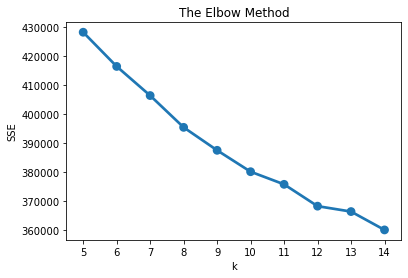

In [424]:
sse = {}
for k in range(5,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_sub_scaler)
    sse[k] = kmeans.inertia_ 
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [425]:
### k=16?
def K_mean_opt(df,k):
    kmeans=KMeans(n_clusters=k,random_state=90).fit(df)
    y_kmeans=kmeans.predict(df)
    y_result=pd.DataFrame(y_kmeans)
    #y_result=pd.concat((pd.DataFrame(df,columns=df_sub_K.columns),y_result),axis=1)
    y_result=pd.concat((df_sub_index,y_result),axis=1)
    y_result.rename({0:'Cluster'},axis=1,inplace=True)
    grouped_cluster=y_result.groupby(by=['Cluster']).sum()
    final_grouped=grouped_cluster.T
    return final_grouped,y_result
Cluster_grouped,Cluster_result=K_mean_opt(df_sub_scaler,12)

In [426]:
Cluster_grouped

Cluster,0,1,2,3,4,5,6,7,8,9,10,11
retarget_TF,331.0000,443.0000,498.0000,218.0000,439.0000,231.0000,328.0000,238.0000,372.0000,268.0000,279.0000,270.0000
monthly_price,58720.2936,52181.8950,61944.7556,33220.9868,63751.4232,46695.5386,50064.6353,33796.0391,48030.7580,39101.3544,44571.6362,40281.6631
cancel_before_trial_end,1136.0000,1042.0000,929.0000,970.0000,927.0000,1185.0000,1105.0000,7137.0000,989.0000,940.0000,1191.0000,697.0000
initial_credit_card_declined,984.0000,902.0000,818.0000,725.0000,802.0000,901.0000,796.0000,4.0000,763.0000,734.0000,993.0000,557.0000
join_fee,1767.5821,1172.8219,1581.4764,886.9289,1687.3192,1160.6008,1296.9780,1060.8502,1090.7607,998.8272,1324.8333,765.6721
...,...,...,...,...,...,...,...,...,...,...,...,...
age_2.0,2389.0000,2808.0000,2686.0000,1336.0000,0.0000,2137.0000,2174.0000,1361.0000,0.0000,2021.0000,1432.0000,8507.0000
age_3.0,2481.0000,2812.0000,3185.0000,1479.0000,4518.0000,2555.0000,2481.0000,1403.0000,3464.0000,1794.0000,1912.0000,0.0000
age_4.0,2721.0000,2310.0000,3114.0000,1716.0000,3518.0000,2192.0000,2338.0000,1714.0000,2357.0000,1565.0000,2350.0000,0.0000
age_5.0,2231.0000,1043.0000,1958.0000,1218.0000,2135.0000,1299.0000,1718.0000,1214.0000,917.0000,829.0000,2165.0000,0.0000


In [429]:
price_mean=Cluster_result.groupby('Cluster')['monthly_price','join_fee'].mean()

<ipython-input-429-e66961779f1a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_mean=Cluster_result.groupby('Cluster')['monthly_price','join_fee'].mean()


In [430]:
Cluster_grouped.to_csv('K_mean_12.csv')
price_mean.to_csv('K_price_mean.csv')

In [431]:
from sklearn.mixture import GaussianMixture

In [432]:
def GMM_opt(df,k):
    clf=GaussianMixture(n_components=k,random_state=233)
    clf.fit(df)
    y_predict=clf.predict(df)
    y_predict=pd.DataFrame(y_predict)
    final_result=pd.concat((df_sub_index,y_predict),axis=1)
    final_result.rename({0:'GMM'},axis=1,inplace=True)
    grouped_cluster=final_result.groupby(by=['GMM']).sum()
    final_grouped=grouped_cluster.T
    return final_grouped,final_result

In [433]:
GMM_group,GMM_result=GMM_opt(df_sub_scaler,12)

In [434]:
GMM_group

GMM,0,1,2,3,4,5,6,7,8,9,10,11
retarget_TF,486.0000,384.0000,230.0000,238.0000,340.0000,555.0000,371.0000,214.0000,245.0000,282.0000,249.0000,321.0000
monthly_price,60461.7453,50557.6998,48483.2690,33742.8608,59395.4635,70667.9052,56511.2472,31644.8319,35238.5693,37997.6386,40807.5007,46852.2476
cancel_before_trial_end,1264.0000,1011.0000,1313.0000,902.0000,1051.0000,1262.0000,709.0000,687.0000,7441.0000,825.0000,932.0000,851.0000
initial_credit_card_declined,966.0000,795.0000,942.0000,650.0000,1042.0000,991.0000,693.0000,685.0000,3.0000,793.0000,750.0000,669.0000
join_fee,1442.0898,1053.9873,1212.0175,877.4970,1793.4556,1812.7598,1430.0522,858.8167,1095.5684,876.2125,1233.6705,1108.5235
...,...,...,...,...,...,...,...,...,...,...,...,...
age_2.0,3244.0000,4056.0000,2198.0000,1767.0000,2425.0000,3067.0000,3664.0000,1547.0000,1475.0000,2033.0000,1375.0000,0.0000
age_3.0,2992.0000,0.0000,2634.0000,272.0000,2526.0000,3623.0000,286.0000,661.0000,1433.0000,1968.0000,1793.0000,9896.0000
age_4.0,2576.0000,2341.0000,2300.0000,1987.0000,2766.0000,3576.0000,3135.0000,1672.0000,1761.0000,1647.0000,2134.0000,0.0000
age_5.0,1267.0000,916.0000,1378.0000,1601.0000,2242.0000,2289.0000,1896.0000,1275.0000,1264.0000,721.0000,1878.0000,0.0000


In [437]:
Gprice_mean=GMM_result.groupby('GMM')['monthly_price','join_fee','age_1.0','age_2.0','age_3.0','age_4.0','age_5.0','age_6.0'].mean()

<ipython-input-437-17b7bc85e302>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Gprice_mean=GMM_result.groupby('GMM')['monthly_price','join_fee','age_1.0','age_2.0','age_3.0','age_4.0','age_5.0','age_6.0'].mean()


In [438]:
GMM_group.to_csv('GMM_12.csv')
Gprice_mean.to_csv('Gprice_mean.csv')

## Churn

In [90]:
df_rep.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [275]:
## define churn
df_rep_drop=df_rep.drop_duplicates(['subid'])

In [276]:
df_rep_drop.shape[0]

1369360

In [277]:
df_sub_rep=df_sub.merge(df_rep_drop,'inner',on='subid')

In [278]:
df_sub_rep.shape[0]

135050

In [279]:
df_sub_rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135050 entries, 0 to 135049
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         135050 non-null  int64         
 1   package_type                  109370 non-null  object        
 2   num_weekly_services_utilized  80815 non-null   float64       
 3   preferred_genre               109090 non-null  object        
 4   intended_use                  132991 non-null  object        
 5   weekly_consumption_hour       110955 non-null  float64       
 6   num_ideal_streaming_services  79600 non-null   float64       
 7   retarget_TF                   135050 non-null  bool          
 8   age                           112339 non-null  float64       
 9   male_TF                       135050 non-null  object        
 10  country                       135050 non-null  object        
 11  attribution_t

In [280]:
df_sub_rep['retarget_TF'].value_counts()

False    130570
True       4480
Name: retarget_TF, dtype: int64

In [281]:
df_sub_rep['current_sub_TF'].value_counts()

False    102695
True      32355
Name: current_sub_TF, dtype: int64

In [282]:
df_sub_rep[df_sub_rep['trial_completed_TF']==False]['paid_TF'].value_counts()

False    72666
Name: paid_TF, dtype: int64

In [283]:
df_sub_rep['trial_completed_TF'].value_counts()

False    72666
True     62384
Name: trial_completed_TF, dtype: int64

In [284]:
df_sub_rep[df_sub_rep['trial_completed_TF']==False]['current_sub_TF'].value_counts()

False    72666
Name: current_sub_TF, dtype: int64

In [285]:
df_sub_rep['revenue_net'].value_counts()

 0.0000     80629
 4.5875     11954
 9.2117      2478
 9.1750      1305
 4.8811      1058
            ...  
-0.5505         1
 11.3036        1
-5.6151         1
 10.6063        1
 0.4037         1
Name: revenue_net, Length: 354, dtype: int64

In [286]:
df_sub_rep['revenue_net_1month'].value_counts()

0.0000    81535
4.5875    31683
4.8811     2838
3.4498     2296
4.7343     1806
          ...  
0.7707        1
3.0461        1
2.5690        1
4.4407        1
1.1377        1
Name: revenue_net_1month, Length: 131, dtype: int64

In [287]:
df_sub_rep[df_sub_rep['trial_completed_TF']==True]['renew'].value_counts()

True     57448
False     4899
Name: renew, dtype: int64

In [294]:
df_churn=df_sub_rep.drop(['trial_completed_TF','paid_TF','last_payment','next_payment',\
                         'payment_type','cancel_before_trial_end','customer_service_rep_id','account_creation_date_x','account_creation_date_y',\
                         'trial_end_date','cancel_date','revenue_net','months_per_bill_period','subid'],axis=1)
df_churn['churn_TF']=df_sub_rep['current_sub_TF']
df_churn.loc[df_churn['current_sub_TF']==False,'churn_TF']=1
df_churn.loc[df_churn['current_sub_TF']==True,'churn_TF']=0

In [295]:
df_churn['discount_rate']=(df_churn['monthly_price']-df_churn['discount_price'])/df_churn['monthly_price']
df_churn=df_churn.drop('discount_price',axis=1)
df_churn=df_churn.drop('current_sub_TF',axis=1)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135050 entries, 0 to 135049
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  109370 non-null  object 
 1   num_weekly_services_utilized  80815 non-null   float64
 2   preferred_genre               109090 non-null  object 
 3   intended_use                  132991 non-null  object 
 4   weekly_consumption_hour       110955 non-null  float64
 5   num_ideal_streaming_services  79600 non-null   float64
 6   retarget_TF                   135050 non-null  bool   
 7   age                           112339 non-null  float64
 8   male_TF                       135050 non-null  object 
 9   country                       135050 non-null  object 
 10  attribution_technical         135050 non-null  object 
 11  attribution_survey            133451 non-null  object 
 12  op_sys                        135045 non-nul

In [296]:
## 所以merge后，所有通过trail的人，全都最近在订阅，那用current_sub_TF就可以定义churn
#df_churn['discount_rate']=(df_sub_rep['monthly_price']-df_sub_rep['discount_price'])/df_sub_rep['monthly_price']

In [297]:
df_churn=df_churn[~df_churn['package_type'].isna()]
df_churn=df_churn[~df_churn['preferred_genre'].isna()]
#df_churn=df_churn[~df_churn['age'].isna()]
df_churn=df_churn[~df_churn['attribution_survey'].isna()]
df_churn=df_churn[~df_churn['op_sys'].isna()]
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108799 entries, 0 to 135049
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  108799 non-null  object 
 1   num_weekly_services_utilized  61177 non-null   float64
 2   preferred_genre               108799 non-null  object 
 3   intended_use                  108664 non-null  object 
 4   weekly_consumption_hour       85888 non-null   float64
 5   num_ideal_streaming_services  60929 non-null   float64
 6   retarget_TF                   108799 non-null  bool   
 7   age                           86088 non-null   float64
 8   male_TF                       108799 non-null  object 
 9   country                       108799 non-null  object 
 10  attribution_technical         108799 non-null  object 
 11  attribution_survey            108799 non-null  object 
 12  op_sys                        108799 non-nul

In [298]:
df_churn=df_churn[(df_churn['age']>0) & (df_churn['age']<100)]

In [299]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85738 entries, 0 to 135049
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   package_type                  85738 non-null  object 
 1   num_weekly_services_utilized  60959 non-null  float64
 2   preferred_genre               85738 non-null  object 
 3   intended_use                  85603 non-null  object 
 4   weekly_consumption_hour       85538 non-null  float64
 5   num_ideal_streaming_services  60711 non-null  float64
 6   retarget_TF                   85738 non-null  bool   
 7   age                           85738 non-null  float64
 8   male_TF                       85738 non-null  object 
 9   country                       85738 non-null  object 
 10  attribution_technical         85738 non-null  object 
 11  attribution_survey            85738 non-null  object 
 12  op_sys                        85738 non-null  object 
 13  

In [300]:
df_churn['creation_until_cancel_days'].fillna(999,inplace=True)
df_churn['num_weekly_services_utilized'].fillna(df_churn['num_weekly_services_utilized'].mean(),inplace=True)
df_churn['num_ideal_streaming_services'].fillna(df_churn['num_ideal_streaming_services'].mean(),inplace=True)
df_churn=df_churn[~df_churn['renew'].isna()]
df_churn=df_churn[~df_churn['intended_use'].isna()]
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85586 entries, 0 to 135049
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   package_type                  85586 non-null  object 
 1   num_weekly_services_utilized  85586 non-null  float64
 2   preferred_genre               85586 non-null  object 
 3   intended_use                  85586 non-null  object 
 4   weekly_consumption_hour       85392 non-null  float64
 5   num_ideal_streaming_services  85586 non-null  float64
 6   retarget_TF                   85586 non-null  bool   
 7   age                           85586 non-null  float64
 8   male_TF                       85586 non-null  object 
 9   country                       85586 non-null  object 
 10  attribution_technical         85586 non-null  object 
 11  attribution_survey            85586 non-null  object 
 12  op_sys                        85586 non-null  object 
 13  

In [301]:
df_churn=df_churn[~df_churn['weekly_consumption_hour'].isna()]

In [302]:
df_churn.loc[df_churn['renew']==True,'renew']=1
df_churn.loc[df_churn['renew']==False,'renew']=0

In [303]:
df_churn.head()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,...,join_fee,language,refund_after_trial_TF,num_trial_days,billing_channel,revenue_net_1month,payment_period,renew,churn_TF,discount_rate
0,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,...,0.1101,ar,False,14,OTT,0.0000,0,0,1,0.046512
1,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,...,0.3303,ar,False,14,OTT,4.5875,0,1,0,0.046512
2,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,...,0.0000,ar,False,14,OTT,3.4498,0,1,0,0.046512
3,base,2.998572,comedy,access to exclusive content,25.851492,1.998059,False,73.0,False,UAE,...,0.6606,ar,False,14,OTT,0.0000,0,0,1,0.046512
4,enhanced,2.998572,comedy,access to exclusive content,37.451142,1.998059,False,24.0,True,UAE,...,0.3303,ar,False,14,OTT,0.0000,0,0,1,0.046512


In [390]:
df_churn_dummy=pd.get_dummies(df_churn,prefix='package_type',prefix_sep='_',columns=['package_type'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='preferred_genre',prefix_sep='_',columns=['preferred_genre'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='intended_use',prefix_sep='_',columns=['intended_use'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='country',prefix_sep='_',columns=['country'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='attribution_technical',prefix_sep='_',columns=['attribution_technical'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='attribution_survey',prefix_sep='_',columns=['attribution_survey'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='op_sys',prefix_sep='_',columns=['op_sys'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='plan_type',prefix_sep='_',columns=['plan_type'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='language',prefix_sep='_',columns=['language'])
df_churn_dummy=pd.get_dummies(df_churn_dummy,prefix='billing_channel',prefix_sep='_',columns=['billing_channel'])

In [391]:
df_churn_dummy

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,monthly_price,creation_until_cancel_days,initial_credit_card_declined,join_fee,...,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,language_ar,billing_channel_OTT
0,3.362885,36.001186,1.951776,False,25.0,True,4.7343,1.0,False,0.1101,...,0,1,0,1,0,0,0,0,1,1
1,2.049135,20.051667,1.860289,False,61.0,False,4.7343,999.0,False,0.3303,...,1,0,0,1,0,0,0,0,1,1
2,3.002048,34.551230,1.870503,False,23.0,False,4.7343,999.0,False,0.0000,...,0,1,0,1,0,0,0,0,1,1
3,2.998572,25.851492,1.998059,False,73.0,False,4.7343,1.0,False,0.6606,...,0,1,0,1,0,0,0,0,1,1
4,2.998572,37.451142,1.998059,False,24.0,True,4.7343,6.0,False,0.3303,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135044,2.514545,30.201361,1.968236,False,32.0,False,4.7343,1.0,False,0.0000,...,1,0,0,1,0,0,0,0,1,1
135046,2.998572,28.751405,1.998059,False,61.0,False,4.7343,0.0,False,0.3303,...,1,0,0,1,0,0,0,0,1,1
135047,2.169904,24.401536,1.881068,False,43.0,False,4.7343,11.0,False,0.0000,...,0,1,0,1,0,0,0,0,1,1
135048,2.594078,28.751405,1.905485,False,38.0,False,4.7343,8.0,False,0.3303,...,0,1,0,1,0,0,0,0,1,1


In [392]:
df_churn_dummy.corr()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,monthly_price,creation_until_cancel_days,initial_credit_card_declined,join_fee,refund_after_trial_TF,...,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,language_ar,billing_channel_OTT
num_weekly_services_utilized,1.000000,0.348282,0.844381,0.001910,0.010897,-0.006024,0.041369,0.038037,0.028865,-0.001362,...,0.093991,-0.093991,-0.006379,0.009963,-0.003317,-0.003724,-0.008117,-0.004904,NaN,NaN
weekly_consumption_hour,0.348282,1.000000,0.088796,-0.025080,-0.024797,-0.005332,0.099288,-0.009531,0.039185,0.010969,...,-0.007660,0.007660,0.002460,0.005871,-0.002165,-0.002555,-0.005920,0.000497,NaN,NaN
num_ideal_streaming_services,0.844381,0.088796,1.000000,0.009042,-0.024324,-0.003948,0.002595,0.043336,0.006574,-0.003642,...,0.092420,-0.092420,-0.005783,0.007395,-0.003046,-0.003022,-0.005757,-0.003866,NaN,NaN
retarget_TF,0.001910,-0.025080,0.009042,1.000000,0.015538,-0.006468,0.007796,0.000742,0.021585,0.000431,...,-0.008231,0.008231,-0.001531,0.007521,-0.000884,-0.001250,-0.007197,-0.000625,NaN,NaN
age,0.010897,-0.024797,-0.024324,0.015538,1.000000,-0.000886,0.100786,-0.055182,0.169967,-0.011124,...,0.030568,-0.030568,-0.005616,0.002876,-0.000895,0.000850,-0.001680,-0.006359,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
plan_type_high_sar_14_day_trial,-0.003724,-0.002555,-0.003022,-0.001250,0.000850,-0.125523,0.000486,0.006979,-0.004939,-0.001249,...,0.005889,-0.005889,-0.000057,-0.125555,-0.000033,1.000000,-0.000363,-0.000023,NaN,NaN
plan_type_high_uae_14_day_trial,-0.008117,-0.005920,-0.005757,-0.007197,-0.001680,0.968477,0.012148,-0.001451,-0.028067,0.004094,...,0.001374,-0.001374,-0.000445,-0.973895,-0.000257,-0.000363,1.000000,-0.000182,NaN,NaN
plan_type_low_gbp_14_day_trial,-0.004904,0.000497,-0.003866,-0.000625,-0.006359,-0.000167,-0.001907,-0.000726,-0.001806,-0.000624,...,-0.002467,0.002467,-0.000029,-0.062777,-0.000017,-0.000023,-0.000182,1.000000,NaN,NaN
language_ar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import itertools
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [307]:
df_train, df_test = model_selection.train_test_split(df_churn_dummy, test_size=0.3)
train_y=df_train['churn_TF']
train_x=df_train.drop('churn_TF',axis=1)

In [308]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59774 entries, 57420 to 4059
Data columns (total 90 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num_weekly_services_utilized                   59774 non-null  float64
 1   weekly_consumption_hour                        59774 non-null  float64
 2   num_ideal_streaming_services                   59774 non-null  float64
 3   retarget_TF                                    59774 non-null  bool   
 4   age                                            59774 non-null  float64
 5   male_TF                                        59774 non-null  object 
 6   monthly_price                                  59774 non-null  float64
 7   creation_until_cancel_days                     59774 non-null  float64
 8   initial_credit_card_declined                   59774 non-null  bool   
 9   join_fee                                       

In [309]:
RF=RandomForestRegressor(n_estimators=1000,n_jobs=-1)

In [310]:
RF.fit(train_x,train_y)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [311]:
feature_importance = RF.feature_importances_
feature_dict=dict(zip(train_x.columns,feature_importance))

In [312]:
feature_dict=sorted(feature_dict.items(), key=lambda d:d[1], reverse = True )

In [313]:
feature_dict

[('creation_until_cancel_days', 0.6812100574167881),
 ('num_ideal_streaming_services', 0.04169118285026382),
 ('num_weekly_services_utilized', 0.04073203138364542),
 ('join_fee', 0.03969857363211044),
 ('age', 0.03595675601905409),
 ('weekly_consumption_hour', 0.023571854246248115),
 ('revenue_net_1month', 0.01879660694107298),
 ('renew', 0.0086836061102375),
 ('preferred_genre_drama', 0.0037785675661198797),
 ('intended_use_replace OTT', 0.0037132239937448736),
 ('preferred_genre_comedy', 0.003678346967158842),
 ('intended_use_access to exclusive content', 0.0036437315600667676),
 ('package_type_enhanced', 0.0036421748664757624),
 ('package_type_base', 0.003613280881711132),
 ('attribution_survey_facebook', 0.003409200661182807),
 ('package_type_economy', 0.0033687761849373198),
 ('attribution_technical_email', 0.003335225564655309),
 ('attribution_survey_referral', 0.003289696376232887),
 ('intended_use_supplement OTT', 0.0030996297117033044),
 ('attribution_survey_tv', 0.00304593834

In [315]:
## Linear Regression
sd_scaler=StandardScaler()
sd_scaler.fit(train_x)
train_x_scaler=sd_scaler.transform(train_x)

In [316]:
train_x_scaler=pd.DataFrame(train_x_scaler,columns=train_x.columns)

In [317]:
train_x_scaler

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,monthly_price,creation_until_cancel_days,initial_credit_card_declined,join_fee,...,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,language_ar,billing_channel_OTT
0,-0.678885,-0.152186,-0.335254,-0.184658,0.325270,-0.386281,-0.048486,-0.551147,-0.211096,2.779259,...,-0.72028,0.72028,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0
1,0.226538,0.441034,-0.378557,-0.184658,0.906774,2.588792,-0.048486,0.099227,-0.211096,-0.526589,...,-0.72028,0.72028,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0
2,2.149686,2.813912,1.440782,-0.184658,1.052151,-0.386281,-0.048486,-0.560818,-0.211096,1.029104,...,1.38835,-1.38835,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0
3,-0.001246,-1.931844,-0.000525,-0.184658,-2.000750,-0.386281,-0.048486,-0.493121,4.737170,-0.721051,...,-0.72028,0.72028,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0
4,-0.440247,-0.745405,-0.486421,-0.184658,1.488279,-0.386281,-0.048486,-0.541476,-0.211096,2.779259,...,1.38835,-1.38835,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59769,-0.818169,-1.042015,-0.239341,-0.184658,-1.419245,-0.386281,-0.048486,-0.560818,-0.211096,-0.526589,...,-0.72028,0.72028,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0
59770,-1.088315,-1.635234,-0.569248,-0.184658,-0.328923,-0.386281,-0.048486,-0.541476,-0.211096,-0.526589,...,-0.72028,0.72028,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0
59771,-0.001246,-1.635234,-0.000525,-0.184658,-0.401611,-0.386281,-0.048486,-0.493121,4.737170,-0.721051,...,-0.72028,0.72028,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0
59772,-0.001246,0.144424,-0.000525,-0.184658,-1.128492,-0.386281,-0.048486,-0.565653,-0.211096,-0.526589,...,-0.72028,0.72028,-0.009146,0.055416,-0.005785,-0.007085,-0.053876,0.0,0.0,0.0


In [318]:
train_y=train_y.reset_index()
train_y=train_y.drop('index',axis=1)

In [319]:
X2 = sm.add_constant(train_x_scaler)
LPM = sm.OLS(endog=train_y.astype(float), exog=X2.astype(float))
LPM2=LPM.fit()

In [320]:
LPM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               churn_TF   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1811.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:11:18   Log-Likelihood:                 8458.4
No. Observations:               59774   AIC:                        -1.677e+04
Df Residuals:                   59699   BIC:                        -1.609e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.8268      0.001    961.837      0.000       0.825       0.829
num_weekly_services_utilized                     -0.0033      0.002     -1.694      0.090      -0.007       0.001
weekly_consumption_hour                           0.0017      0.001      1.454      0.146      -0.001       0.004
num_ideal_streaming_services                      0.0014      0.002      0.799      0.424      -0.002       0.005
retarget_TF                                      -0.0009      0.001     -0.989      0.322      -0.003       0.001
age                                              -0.0017      0.001     -1.747      0.081      -0.004       0.000
male_TF                                          -0.0082      0.001     -7.439      0.000      -0.010      -0.006
monthly_price                                     0.0015      0.000      5.308      0.000       0.001       0.002
creation_until_cancel_days                       -0.2158      0.003    -69.759      0.000      -0.222      -0.210
initial_credit_card_declined                      0.0026      0.001      2.972      0.003       0.001       0.004
join_fee                                         -0.0316      0.001    -33.888      0.000      -0.033      -0.030
refund_after_trial_TF                             0.0094      0.002      5.027      0.000       0.006       0.013
num_trial_days                                 5.539e-17   2.29e-18     24.180      0.000    5.09e-17    5.99e-17
revenue_net_1month                               -0.0783      0.004    -21.971      0.000      -0.085      -0.071
payment_period                                -3.664e-17   1.11e-18    -32.901      0.000   -3.88e-17   -3.45e-17
renew                                            -0.0182      0.005     -3.857      0.000      -0.027      -0.009
discount_rate                                    -0.0015      0.000     -6.410      0.000      -0.002      -0.001
package_type_base                                 0.0008      0.000      1.626      0.104      -0.000       0.002
package_type_economy                             -0.0011      0.001     -1.471      0.141      -0.003       0.000
package_type_enhanced                            -0.0002      0.001     -0.282      0.778      -0.001       0.001
preferred_genre_comedy                           -0.0011      0.001     -2.161      0.031      -0.002      -0.000
preferred_genre_drama                            -0.0004      0.001     -0.690      0.490      -0.002       0.001
preferred_genre_international                    -0.0004      0.001     -0.483      0.629      -0.002       0.001
preferred_genre_other                             0.0023      0.001      2.778      0.005       0.001       0.004
prefe

In [321]:
### 出现共线性，所以要删除一些相关变量
corr_train=df_churn.corr()
corr_train

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,monthly_price,creation_until_cancel_days,initial_credit_card_declined,join_fee,refund_after_trial_TF,num_trial_days,revenue_net_1month,payment_period,discount_rate
num_weekly_services_utilized,1.000000,0.348282,0.844381,0.001910,0.010897,-0.006024,0.041369,0.038037,0.028865,-0.001362,NaN,0.040509,NaN,0.007281
weekly_consumption_hour,0.348282,1.000000,0.088796,-0.025080,-0.024797,-0.005332,0.099288,-0.009531,0.039185,0.010969,NaN,0.097868,NaN,0.005690
num_ideal_streaming_services,0.844381,0.088796,1.000000,0.009042,-0.024324,-0.003948,0.002595,0.043336,0.006574,-0.003642,NaN,0.002052,NaN,0.005073
retarget_TF,0.001910,-0.025080,0.009042,1.000000,0.015538,-0.006468,0.007796,0.000742,0.021585,0.000431,NaN,0.009252,NaN,0.006968
age,0.010897,-0.024797,-0.024324,0.015538,1.000000,-0.000886,0.100786,-0.055182,0.169967,-0.011124,NaN,0.107514,NaN,0.001240
monthly_price,-0.006024,-0.005332,-0.003948,-0.006468,-0.000886,1.000000,0.010473,-0.001879,-0.025366,0.003494,NaN,0.019474,NaN,-0.979375
creation_until_cancel_days,0.041369,0.099288,0.002595,0.007796,0.100786,0.010473,1.000000,-0.103970,0.081060,-0.085356,NaN,0.932625,NaN,-0.011997
initial_credit_card_declined,0.038037,-0.009531,0.043336,0.000742,-0.055182,-0.001879,-0.103970,1.000000,-0.016224,-0.037717,NaN,-0.115670,NaN,0.001925
join_fee,0.028865,0.039185,0.006574,0.021585,0.169967,-0.025366,0.081060,-0.016224,1.000000,0.035736,NaN,0.082415,NaN,0.027227
refund_after_trial_TF,-0.001362,0.010969,-0.003642,0.000431,-0.011124,0.003494,-0.085356,-0.037717,0.035736,1.000000,NaN,-0.026536,NaN,-0.004138


In [323]:
used_column=['male_TF','discount_rate','monthly_price','creation_until_cancel_days','initial_credit_card_declined','join_fee','refund_after_trial_TF',\
'num_trial_days','revenue_net_1month','payment_period','renew','plan_type','intended_use','preferred_genre','churn_TF']

In [324]:
df_churn_F=df_churn[used_column]

In [325]:
df_churn_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85392 entries, 0 to 135049
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   male_TF                       85392 non-null  object 
 1   discount_rate                 85392 non-null  float64
 2   monthly_price                 85392 non-null  float64
 3   creation_until_cancel_days    85392 non-null  float64
 4   initial_credit_card_declined  85392 non-null  bool   
 5   join_fee                      85392 non-null  float64
 6   refund_after_trial_TF         85392 non-null  bool   
 7   num_trial_days                85392 non-null  int64  
 8   revenue_net_1month            85392 non-null  float64
 9   payment_period                85392 non-null  int64  
 10  renew                         85392 non-null  object 
 11  plan_type                     85392 non-null  object 
 12  intended_use                  85392 non-null  object 
 13  

In [327]:
df_churn_F.loc[df_churn_F["male_TF"]==False,'male_TF']=0
df_churn_F.loc[df_churn_F["male_TF"]==True,'male_TF']=1

In [328]:
df_churn_F.loc[df_churn_F["renew"]==False,'renew']=0
df_churn_F.loc[df_churn_F["renew"]==True,'renew']=1

In [329]:
df_churn_F["intended_use"].value_counts()

access to exclusive content    38577
replace OTT                    31170
supplement OTT                 12685
other                           2774
expand regional access            86
expand international access       71
education                         29
Name: intended_use, dtype: int64

In [330]:
df_churn_F.loc[df_churn_F["intended_use"]=='access to exclusive content','intended_use']=0
df_churn_F.loc[df_churn_F["intended_use"]=='replace OTT','intended_use']=1
df_churn_F.loc[df_churn_F["intended_use"]=='supplement OTT','intended_use']=2
df_churn_F.loc[df_churn_F["intended_use"]=='other','intended_use']=3
df_churn_F.loc[df_churn_F["intended_use"]=='expand regional access','intended_use']=4
df_churn_F.loc[df_churn_F["intended_use"]=='expand international access','intended_use']=5
df_churn_F.loc[df_churn_F["intended_use"]=='education','intended_use']=6

In [331]:
df_churn_F["preferred_genre"].value_counts()

comedy           53788
drama            21334
regional          4930
international     3135
other             2205
Name: preferred_genre, dtype: int64

In [332]:
df_churn_F.loc[df_churn_F["preferred_genre"]=='comedy','preferred_genre']=0
df_churn_F.loc[df_churn_F["preferred_genre"]=='drama','preferred_genre']=1
df_churn_F.loc[df_churn_F["preferred_genre"]=='regional','preferred_genre']=2
df_churn_F.loc[df_churn_F["preferred_genre"]=='international','preferred_genre']=3
df_churn_F.loc[df_churn_F["preferred_genre"]=='other','preferred_genre']=4

In [333]:
df_churn_F["plan_type"].value_counts()

base_uae_14_day_trial    85139
high_uae_14_day_trial      240
base_eur_14_day_trial        6
high_sar_14_day_trial        4
high_aud_14_day_trial        2
low_gbp_14_day_trial         1
Name: plan_type, dtype: int64

In [334]:
df_churn_F.loc[df_churn_F["plan_type"]=='base_uae_14_day_trial','plan_type']=0
df_churn_F.loc[df_churn_F["plan_type"]=='high_uae_14_day_trial','plan_type']=1
df_churn_F.loc[df_churn_F["plan_type"]=='base_eur_14_day_trial','plan_type']=2
df_churn_F.loc[df_churn_F["plan_type"]=='high_sar_14_day_trial','plan_type']=3
df_churn_F.loc[df_churn_F["plan_type"]=='high_aud_14_day_trial','plan_type']=4
df_churn_F.loc[df_churn_F["plan_type"]=='low_gbp_14_day_trial','plan_type']=5

In [335]:
df_churn_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85392 entries, 0 to 135049
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   male_TF                       85392 non-null  object 
 1   discount_rate                 85392 non-null  float64
 2   monthly_price                 85392 non-null  float64
 3   creation_until_cancel_days    85392 non-null  float64
 4   initial_credit_card_declined  85392 non-null  bool   
 5   join_fee                      85392 non-null  float64
 6   refund_after_trial_TF         85392 non-null  bool   
 7   num_trial_days                85392 non-null  int64  
 8   revenue_net_1month            85392 non-null  float64
 9   payment_period                85392 non-null  int64  
 10  renew                         85392 non-null  object 
 11  plan_type                     85392 non-null  object 
 12  intended_use                  85392 non-null  object 
 13  

In [346]:
df_churn_F['male_TF']=pd.to_numeric(df_churn_F['male_TF'],errors='coerce')
df_churn_F['renew']=pd.to_numeric(df_churn_F['renew'],errors='coerce')
df_churn_F['plan_type']=pd.to_numeric(df_churn_F['plan_type'],errors='coerce')
df_churn_F['intended_use']=pd.to_numeric(df_churn_F['intended_use'],errors='coerce')
df_churn_F['preferred_genre']=pd.to_numeric(df_churn_F['preferred_genre'],errors='coerce')
df_churn_F['churn_TF']=pd.to_numeric(df_churn_F['churn_TF'],errors='coerce')

<ipython-input-346-fb91d2f3b088>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_F['male_TF']=pd.to_numeric(df_churn_F['male_TF'],errors='coerce')
<ipython-input-346-fb91d2f3b088>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_F['renew']=pd.to_numeric(df_churn_F['renew'],errors='coerce')
<ipython-input-346-fb91d2f3b088>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [347]:
df_churn_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85392 entries, 0 to 135049
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   male_TF                       85392 non-null  int64  
 1   discount_rate                 85392 non-null  float64
 2   monthly_price                 85392 non-null  float64
 3   creation_until_cancel_days    85392 non-null  float64
 4   initial_credit_card_declined  85392 non-null  bool   
 5   join_fee                      85392 non-null  float64
 6   refund_after_trial_TF         85392 non-null  bool   
 7   num_trial_days                85392 non-null  int64  
 8   revenue_net_1month            85392 non-null  float64
 9   payment_period                85392 non-null  int64  
 10  renew                         85392 non-null  int64  
 11  plan_type                     85392 non-null  int64  
 12  intended_use                  85392 non-null  int64  
 13  

In [348]:
df_train, df_test = model_selection.train_test_split(df_churn_F, test_size=0.3)

In [349]:
train_x=df_train.drop('churn_TF',axis=1)
train_y=df_train['churn_TF']
test_x=df_test.drop('churn_TF',axis=1)
test_y=df_test['churn_TF']

In [350]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [351]:
## CatBoost
cat_model = CatBoostClassifier(
    iterations = 500,
    learning_rate = 0.01,
    depth = 10,
    random_seed = 32, 
    od_type = "Iter",
    od_wait = 100,
    eval_metric = 'AUC',
    auto_class_weights = 'None',
    verbose = True
             )
cat_model.fit(train_x,train_y,eval_set=(test_x,test_y))

0:	test: 0.9781916	best: 0.9781916 (0)	total: 337ms	remaining: 2m 48s
1:	test: 0.9792050	best: 0.9792050 (1)	total: 438ms	remaining: 1m 48s
2:	test: 0.9793396	best: 0.9793396 (2)	total: 528ms	remaining: 1m 27s
3:	test: 0.9794006	best: 0.9794006 (3)	total: 652ms	remaining: 1m 20s
4:	test: 0.9801490	best: 0.9801490 (4)	total: 1s	remaining: 1m 39s
5:	test: 0.9801655	best: 0.9801655 (5)	total: 1.35s	remaining: 1m 51s
6:	test: 0.9800794	best: 0.9801655 (5)	total: 1.69s	remaining: 1m 58s
7:	test: 0.9805938	best: 0.9805938 (7)	total: 2s	remaining: 2m 3s
8:	test: 0.9805979	best: 0.9805979 (8)	total: 2.34s	remaining: 2m 7s
9:	test: 0.9805908	best: 0.9805979 (8)	total: 2.43s	remaining: 1m 58s
10:	test: 0.9805866	best: 0.9805979 (8)	total: 2.78s	remaining: 2m 3s
11:	test: 0.9805536	best: 0.9805979 (8)	total: 3.12s	remaining: 2m 6s
12:	test: 0.9805092	best: 0.9805979 (8)	total: 3.45s	remaining: 2m 9s
13:	test: 0.9804889	best: 0.9805979 (8)	total: 3.57s	remaining: 2m 3s
14:	test: 0.9804051	best: 0.

116:	test: 0.9813504	best: 0.9813504 (116)	total: 32.4s	remaining: 1m 46s
117:	test: 0.9813541	best: 0.9813541 (117)	total: 32.7s	remaining: 1m 45s
118:	test: 0.9813551	best: 0.9813551 (118)	total: 32.8s	remaining: 1m 45s
119:	test: 0.9813597	best: 0.9813597 (119)	total: 33.1s	remaining: 1m 44s
120:	test: 0.9813733	best: 0.9813733 (120)	total: 33.4s	remaining: 1m 44s
121:	test: 0.9813734	best: 0.9813734 (121)	total: 33.8s	remaining: 1m 44s
122:	test: 0.9813734	best: 0.9813734 (122)	total: 33.8s	remaining: 1m 43s
123:	test: 0.9813724	best: 0.9813734 (122)	total: 34.1s	remaining: 1m 43s
124:	test: 0.9813652	best: 0.9813734 (122)	total: 34.4s	remaining: 1m 43s
125:	test: 0.9813871	best: 0.9813871 (125)	total: 34.7s	remaining: 1m 43s
126:	test: 0.9813843	best: 0.9813871 (125)	total: 35s	remaining: 1m 42s
127:	test: 0.9813848	best: 0.9813871 (125)	total: 35.3s	remaining: 1m 42s
128:	test: 0.9814001	best: 0.9814001 (128)	total: 35.6s	remaining: 1m 42s
129:	test: 0.9813971	best: 0.9814001 (12

228:	test: 0.9816035	best: 0.9816049 (226)	total: 1m 4s	remaining: 1m 16s
229:	test: 0.9816072	best: 0.9816072 (229)	total: 1m 5s	remaining: 1m 16s
230:	test: 0.9816120	best: 0.9816120 (230)	total: 1m 5s	remaining: 1m 16s
231:	test: 0.9816060	best: 0.9816120 (230)	total: 1m 5s	remaining: 1m 16s
232:	test: 0.9816223	best: 0.9816223 (232)	total: 1m 6s	remaining: 1m 15s
233:	test: 0.9816219	best: 0.9816223 (232)	total: 1m 6s	remaining: 1m 15s
234:	test: 0.9816249	best: 0.9816249 (234)	total: 1m 6s	remaining: 1m 15s
235:	test: 0.9816233	best: 0.9816249 (234)	total: 1m 6s	remaining: 1m 14s
236:	test: 0.9816253	best: 0.9816253 (236)	total: 1m 7s	remaining: 1m 14s
237:	test: 0.9816377	best: 0.9816377 (237)	total: 1m 7s	remaining: 1m 14s
238:	test: 0.9816388	best: 0.9816388 (238)	total: 1m 7s	remaining: 1m 14s
239:	test: 0.9816373	best: 0.9816388 (238)	total: 1m 8s	remaining: 1m 13s
240:	test: 0.9816437	best: 0.9816437 (240)	total: 1m 8s	remaining: 1m 13s
241:	test: 0.9816489	best: 0.9816489 (

339:	test: 0.9817168	best: 0.9817236 (332)	total: 1m 37s	remaining: 45.8s
340:	test: 0.9817230	best: 0.9817236 (332)	total: 1m 37s	remaining: 45.5s
341:	test: 0.9817271	best: 0.9817271 (341)	total: 1m 37s	remaining: 45.2s
342:	test: 0.9817282	best: 0.9817282 (342)	total: 1m 38s	remaining: 44.9s
343:	test: 0.9817285	best: 0.9817285 (343)	total: 1m 38s	remaining: 44.6s
344:	test: 0.9817268	best: 0.9817285 (343)	total: 1m 38s	remaining: 44.4s
345:	test: 0.9817266	best: 0.9817285 (343)	total: 1m 38s	remaining: 44s
346:	test: 0.9817288	best: 0.9817288 (346)	total: 1m 39s	remaining: 43.7s
347:	test: 0.9817280	best: 0.9817288 (346)	total: 1m 39s	remaining: 43.5s
348:	test: 0.9817255	best: 0.9817288 (346)	total: 1m 39s	remaining: 43.2s
349:	test: 0.9817249	best: 0.9817288 (346)	total: 1m 40s	remaining: 42.9s
350:	test: 0.9817244	best: 0.9817288 (346)	total: 1m 40s	remaining: 42.7s
351:	test: 0.9817231	best: 0.9817288 (346)	total: 1m 40s	remaining: 42.4s
352:	test: 0.9817217	best: 0.9817288 (34

451:	test: 0.9817528	best: 0.9817634 (444)	total: 2m 5s	remaining: 13.4s
452:	test: 0.9817507	best: 0.9817634 (444)	total: 2m 6s	remaining: 13.1s
453:	test: 0.9817517	best: 0.9817634 (444)	total: 2m 6s	remaining: 12.8s
454:	test: 0.9817510	best: 0.9817634 (444)	total: 2m 6s	remaining: 12.5s
455:	test: 0.9817499	best: 0.9817634 (444)	total: 2m 6s	remaining: 12.3s
456:	test: 0.9817503	best: 0.9817634 (444)	total: 2m 7s	remaining: 12s
457:	test: 0.9817512	best: 0.9817634 (444)	total: 2m 7s	remaining: 11.7s
458:	test: 0.9817538	best: 0.9817634 (444)	total: 2m 7s	remaining: 11.4s
459:	test: 0.9817520	best: 0.9817634 (444)	total: 2m 8s	remaining: 11.2s
460:	test: 0.9817519	best: 0.9817634 (444)	total: 2m 8s	remaining: 10.9s
461:	test: 0.9817476	best: 0.9817634 (444)	total: 2m 8s	remaining: 10.6s
462:	test: 0.9817473	best: 0.9817634 (444)	total: 2m 8s	remaining: 10.3s
463:	test: 0.9817486	best: 0.9817634 (444)	total: 2m 9s	remaining: 10s
464:	test: 0.9817498	best: 0.9817634 (444)	total: 2m 9s

In [352]:
## XGBoost
xgb_model=XGBClassifier(use_label_encoder=False,
    colsample_bytree=0.8,eta=0.1,gamma=0.001,max_depth=5,n_estimators=200,\
    seed=200,eval_metric="auc")
xgb_model.fit(train_x,train_y,eval_set=[(test_x,test_y)])

[0]	validation_0-auc:0.97682
[1]	validation_0-auc:0.98093
[2]	validation_0-auc:0.98087
[3]	validation_0-auc:0.98117
[4]	validation_0-auc:0.98148
[5]	validation_0-auc:0.98155
[6]	validation_0-auc:0.98158
[7]	validation_0-auc:0.98158
[8]	validation_0-auc:0.98158
[9]	validation_0-auc:0.98161
[10]	validation_0-auc:0.98169
[11]	validation_0-auc:0.98181
[12]	validation_0-auc:0.98182
[13]	validation_0-auc:0.98182
[14]	validation_0-auc:0.98181
[15]	validation_0-auc:0.98180
[16]	validation_0-auc:0.98178
[17]	validation_0-auc:0.98177
[18]	validation_0-auc:0.98182
[19]	validation_0-auc:0.98184
[20]	validation_0-auc:0.98191
[21]	validation_0-auc:0.98187
[22]	validation_0-auc:0.98186
[23]	validation_0-auc:0.98188
[24]	validation_0-auc:0.98191
[25]	validation_0-auc:0.98193
[26]	validation_0-auc:0.98194
[27]	validation_0-auc:0.98191
[28]	validation_0-auc:0.98194
[29]	validation_0-auc:0.98194
[30]	validation_0-auc:0.98194
[31]	validation_0-auc:0.98190
[32]	validation_0-auc:0.98187
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.1,
              eval_metric='auc', gamma=0.001, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=200, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=200, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [353]:
# ------ DEFINE FUNCTIONS -----
import copy
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_cat'] = (df_f['prob_churn_cat'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_cat'] = (df_f['make_offer_cat'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_cat_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_cat'], 'price_cat_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_xgb'] = (df_f['prob_churn_xgb'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_xgb'] = (df_f['make_offer_xgb'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_xgb_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_xgb'], 'price_xgb_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 20)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [354]:
df_churn_F[df_churn_F['churn_TF']==1]['discount_rate'].value_counts()

0.046512    70403
0.014388      210
0.049587        5
0.067227        3
0.055046        1
0.077519        1
Name: discount_rate, dtype: int64

In [355]:
cat_prob=cat_model.predict_proba(test_x)

In [356]:
xgb_prob=xgb_model.predict_proba(test_x)

In [357]:
xgb_prob=pd.DataFrame(xgb_prob)
cat_prob=pd.DataFrame(cat_prob)

In [358]:
test_x=pd.DataFrame(test_x)
test_x=test_x.reset_index()

In [359]:
xgb_prob

,0,1
0,0.909068,0.090932
1,0.000002,0.999998
2,0.926880,0.073120
3,0.000006,0.999994
4,0.561946,0.438054
...,...,...
25613,0.592334,0.407666
25614,0.000004,0.999996
25615,0.000017,0.999983
25616,0.000009,0.999991


In [360]:
test_x=test_x.drop('index',axis=1)

In [361]:
test_x['prob_churn_cat']=cat_prob.iloc[:,1]

In [363]:
test_y=test_y.reset_index()
test_y=test_y.drop('index',axis=1)
test_x['churn_TF']=test_y

In [366]:
test_x

,male_TF,discount_rate,monthly_price,creation_until_cancel_days,initial_credit_card_declined,join_fee,refund_after_trial_TF,num_trial_days,revenue_net_1month,payment_period,renew,plan_type,intended_use,preferred_genre,prob_churn_cat,churn_TF
0,0,0.046512,4.7343,999.0,False,0.6606,False,14,4.5875,0,1,0,1,0,0.084962,0
1,0,0.046512,4.7343,6.0,False,0.0367,False,14,0.0000,0,0,0,1,0,0.999988,1
2,0,0.046512,4.7343,999.0,False,0.3303,False,14,4.5875,0,1,0,1,1,0.075970,1
3,0,0.046512,4.7343,7.0,False,0.1101,False,14,0.0000,0,0,0,1,4,0.999814,1
4,0,0.046512,4.7343,999.0,False,0.0367,False,14,4.5875,0,1,0,2,0,0.419998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25613,0,0.046512,4.7343,999.0,False,0.0367,False,14,4.5875,0,1,0,0,0,0.398315,1
25614,0,0.046512,4.7343,13.0,False,0.0367,False,14,0.0000,0,0,0,0,1,0.999982,1
25615,0,0.046512,4.7343,0.0,False,0.3303,False,14,0.0000,0,0,0,0,0,0.999976,1
25616,0,0.046512,4.7343,3.0,False,0.3303,False,14,0.0000,0,0,0,1,1,0.999966,1


In [367]:
test_x['prob_churn_xgb']=xgb_prob.iloc[:,1]

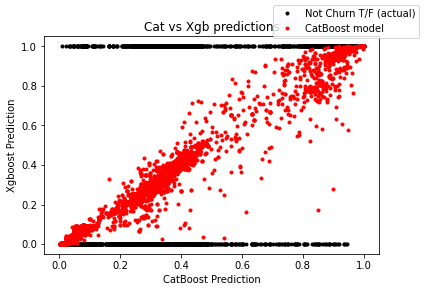

In [442]:
# compare cat and xgb predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(test_x[['prob_churn_cat']], test_x[['churn_TF']], 'k.')
ax.plot(test_x[['prob_churn_cat']],test_x[['prob_churn_xgb']], 'r.')
plt.ylim(test_x[['prob_churn_cat', 'prob_churn_xgb']].min().min()-.05, test_x[['prob_churn_cat', 'prob_churn_xgb']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('Cat vs Xgb predictions')
plt.xlabel('CatBoost Prediction')
plt.ylabel('Xgboost Prediction')
fig.legend(labels=['Not Churn T/F (actual)', 'CatBoost model', 'Xgboost probability'])
plt.savefig('cat vs xgb.png', bbox_inches='tight')

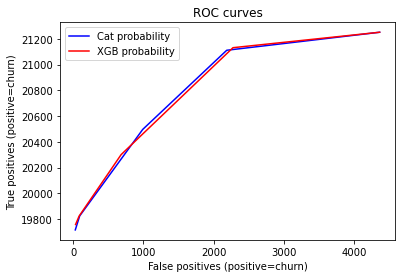

In [443]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(test_x['churn_TF'], test_x['prob_churn_cat'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(test_x['churn_TF'], test_x['prob_churn_xgb'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Cat probability', 'XGB probability'])
plt.savefig('ROC.png', bbox_inches='tight')

In [373]:
acceptance_rate_nonchurn = df_test[(df_test['churn_TF']==False) & (df_test['renew']==True)].shape[0]/df_test[(df_test['churn_TF']==False)].shape[0]
acceptance_rate_nonchurn

0.9972521181589191

In [457]:
import math
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer 
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = test_x['monthly_price']
discount_amount = 0.3
cases = ['no_offer', 'cat_offer', 'xgb_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
test_x['random_draws'] = np.random.random(test_x.shape[0])
test_x.loc[test_x['churn_TF']==0,'random_draws']=acceptance_rate_nonchurn
test_x.loc[test_x['churn_TF']==1,'random_draws']=np.random.random(test_x[test_x['churn_TF']==1].shape[0])

# base assessment
test_x, df_impact = apply_offers(test_x, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

churn_rate=len(test_x[test_x['prob_churn_cat']>threshold])/test_x.shape[0]
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(test_x, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    t_discount_amount=t_acceptance_rate_churn
    _, t_df_impact = apply_offers(test_x, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn=4*t_discount_amount/(1+math.exp(2*t_discount_amount))
    _, t_df_impact = apply_offers(test_x, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

In [458]:
print(churn_rate)

0.7794129127956906


In [459]:
df_impact

,subs,revenue,lift_from_no_offer
no_offer,4367,20678,0
cat_offer,10235,40128.5,0.940636
xgb_offer,10234,40125.4,0.940488


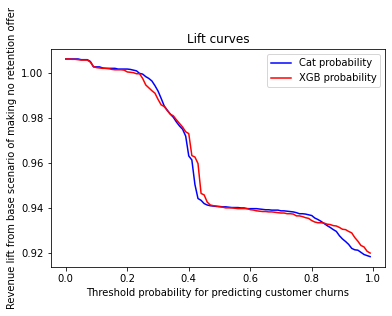

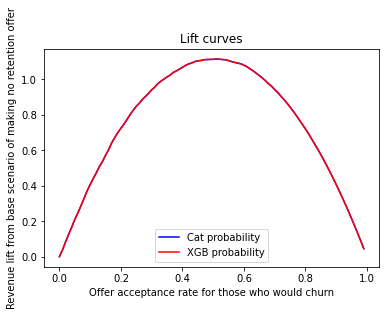

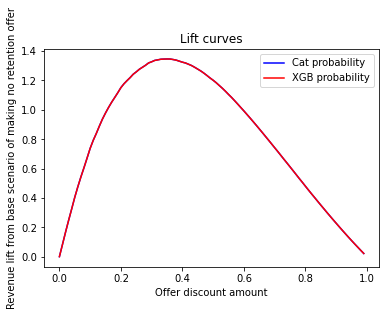

In [460]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['cat_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['xgb_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Cat probability', 'XGB probability'])
plt.savefig('threshold_test.png', bbox_inches='tight')
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['cat_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['xgb_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Cat probability', 'XGB probability'])
plt.savefig('accept_rate_Test.png', bbox_inches='tight')
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['cat_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['xgb_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Cat probability', 'XGB probability'])
plt.savefig('discount_test.png', bbox_inches='tight')

In [461]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer 
acceptance_rate_churn = 0.5
threshold = 0.25
base_price = test_x['monthly_price']
discount_amount = 0.3
cases = ['no_offer', 'cat_offer', 'xgb_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
test_x['random_draws'] = np.random.random(test_x.shape[0])
test_x.loc[test_x['churn_TF']==0,'random_draws']=acceptance_rate_nonchurn
test_x.loc[test_x['churn_TF']==1,'random_draws']=np.random.random(test_x[test_x['churn_TF']==1].shape[0])

# base assessment
test_x, df_impact = apply_offers(test_x, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

churn_rate=test_x
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(1, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(test_x, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(1, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    t_discount_amount=t_acceptance_rate_churn
    _, t_df_impact = apply_offers(test_x, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(1, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn=4*t_discount_amount/(1+math.exp(2*t_discount_amount))
    _, t_df_impact = apply_offers(test_x, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

In [462]:
df_impact

,subs,revenue,lift_from_no_offer
no_offer,4367,20678,0
cat_offer,14936,55710.7,1.6942
xgb_offer,14913,55634.5,1.69052


In [455]:
churn_rate=len(test_x[test_x['prob_churn_cat']>threshold])/test_x.shape[0]
print(churn_rate)

0.9054571004762276


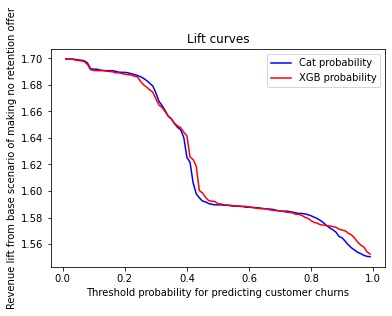

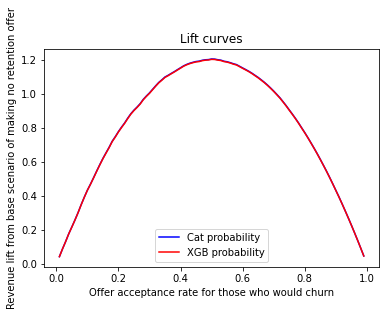

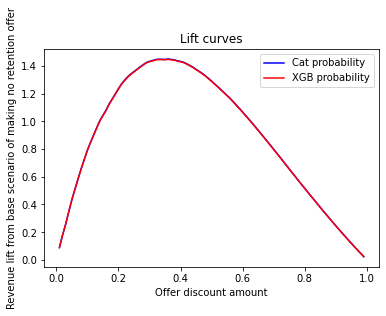

In [445]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['cat_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['xgb_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Cat probability', 'XGB probability'])
plt.savefig('thre_sense.png', bbox_inches='tight')
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['cat_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['xgb_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Cat probability', 'XGB probability'])
plt.savefig('accept_sense.png', bbox_inches='tight')
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['cat_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['xgb_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Cat probability', 'XGB probability'])
plt.savefig('discount_sense.png', bbox_inches='tight')